# Loading libraries 


In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from scipy import stats
import numpy as np
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Setting working directory and loading data 

In [2]:
##Setting working directory
import os 
os.chdir(r"E:\DM_assgn")
os.getcwd ()
##loading data 
DIR='E:\DM_assgn\old.xlsx'
data = pd.read_excel(DIR)

# data view check and Description check

In [3]:
data.head()
# shape and data types of the data
print(data.shape)
print(data.dtypes)
# select numeric columns
df_numeric = data.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)
# select non numeric columns
df_non_numeric = data.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)


(4000, 15)
Rec_ID                 int64
GeneID                 int64
Colour                object
Cell_Cycle_Cat         int64
Cell_Cycle_Number      int64
Gene_Induction         int64
Symbol                object
LocusTag              object
Synonyms              object
dbXrefs               object
chromosome            object
description           object
type_of_gene          object
Other_designations    object
Class                 object
dtype: object
['Rec_ID' 'GeneID' 'Cell_Cycle_Cat' 'Cell_Cycle_Number' 'Gene_Induction']
['Colour' 'Symbol' 'LocusTag' 'Synonyms' 'dbXrefs' 'chromosome'
 'description' 'type_of_gene' 'Other_designations' 'Class']


In [4]:
data.describe()

Rec_ID        GeneID  Cell_Cycle_Cat  Cell_Cycle_Number  \
count  4000.000000  4.000000e+03     4000.000000        4000.000000   
mean   2000.500000  9.360408e+07     1417.162000          17.507750   
std    1154.844867  2.408665e+07      571.007827           6.109564   
min       1.000000  7.909580e+05      512.000000           5.000000   
25%    1000.750000  1.000741e+08     1320.000000          13.000000   
50%    2000.500000  1.000754e+08     1320.000000          18.000000   
75%    3000.250000  1.026072e+08     2128.000000          22.000000   
max    4000.000000  1.026083e+08     2128.000000          28.000000   

       Gene_Induction  
count     4000.000000  
mean         0.665500  
std          0.471874  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

# Data preparation(missing value check,Outlier etc.)

Rec_ID - 0.0%
GeneID - 0.0%
Colour - 0.0%
Cell_Cycle_Cat - 0.0%
Cell_Cycle_Number - 0.0%
Gene_Induction - 0.0%
Symbol - 0.0%
LocusTag - 84.0%
Synonyms - 96.0%
dbXrefs - 60.0%
chromosome - 8.0%
description - 2.0%
type_of_gene - 0.0%
Other_designations - 11.0%
Class - 0.0%
created missing indicator for: LocusTag
created missing indicator for: Synonyms
created missing indicator for: dbXrefs
created missing indicator for: chromosome
created missing indicator for: description
created missing indicator for: Other_designations


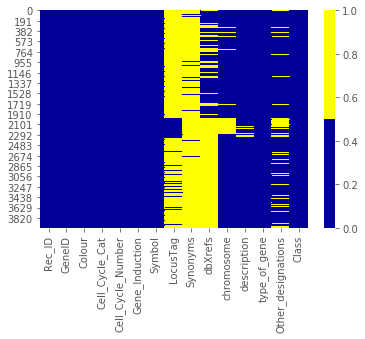

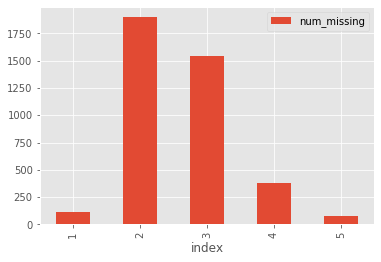

In [5]:
##Technique #1: Missing Data Heatmap
cols = data.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

##Technique #2: Missing Data Percentage List

# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
##Technique #3: Missing Data Histogram
# first create missing indicator for features with missing data
for col in data.columns:
    missing = data[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        data['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in data.columns if 'ismissing' in col]
data['num_missing'] = data[ismissing_cols].sum(axis=1)

data['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


In [6]:
## drop new Dummy columns which created in last steps for Graphs 
print(data.shape)
print(data.dtypes)
data.drop(['LocusTag_ismissing','Synonyms_ismissing','dbXrefs_ismissing','chromosome_ismissing','description_ismissing','Other_designations_ismissing','num_missing'], axis=1, inplace=True)


(4000, 22)
Rec_ID                           int64
GeneID                           int64
Colour                          object
Cell_Cycle_Cat                   int64
Cell_Cycle_Number                int64
Gene_Induction                   int64
Symbol                          object
LocusTag                        object
Synonyms                        object
dbXrefs                         object
chromosome                      object
description                     object
type_of_gene                    object
Other_designations              object
Class                           object
LocusTag_ismissing                bool
Synonyms_ismissing                bool
dbXrefs_ismissing                 bool
chromosome_ismissing              bool
description_ismissing             bool
Other_designations_ismissing      bool
num_missing                      int64
dtype: object


In [7]:
print(data.dtypes)
print(data.shape)

Rec_ID                 int64
GeneID                 int64
Colour                object
Cell_Cycle_Cat         int64
Cell_Cycle_Number      int64
Gene_Induction         int64
Symbol                object
LocusTag              object
Synonyms              object
dbXrefs               object
chromosome            object
description           object
type_of_gene          object
Other_designations    object
Class                 object
dtype: object
(4000, 15)


In [8]:
# drop Coulmns(features) with a lot of missing values. (drop column where missing > 50%)
New_data=data.drop(['LocusTag', 'Synonyms','dbXrefs'], axis=1)
##Now check again if column dropped and How many now missing values
print(New_data.isnull().sum())
for col in New_data.columns:
    pct_missing = np.mean(New_data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
print(New_data.shape)

Rec_ID                  0
GeneID                  0
Colour                  0
Cell_Cycle_Cat          0
Cell_Cycle_Number       0
Gene_Induction          0
Symbol                  0
chromosome            311
description            91
type_of_gene            0
Other_designations    449
Class                   0
dtype: int64
Rec_ID - 0.0%
GeneID - 0.0%
Colour - 0.0%
Cell_Cycle_Cat - 0.0%
Cell_Cycle_Number - 0.0%
Gene_Induction - 0.0%
Symbol - 0.0%
chromosome - 8.0%
description - 2.0%
type_of_gene - 0.0%
Other_designations - 11.0%
Class - 0.0%
(4000, 12)


In [9]:
##Impute Or Drop missing values rows the Missing for columns which have less than 12% Misisng values. Now we have Missing values less than 10% ,Lets remove those
##Impute and Drop missing values rows the Missing for columns which have less than 12% Misisng values
nan_value = float("NaN") 
New_data.replace("", nan_value, inplace=True)
New_data.dropna(axis=0,how='any',inplace=True)
print(New_data.isnull().sum())
print(New_data.shape)



Rec_ID                0
GeneID                0
Colour                0
Cell_Cycle_Cat        0
Cell_Cycle_Number     0
Gene_Induction        0
Symbol                0
chromosome            0
description           0
type_of_gene          0
Other_designations    0
Class                 0
dtype: int64
(3457, 12)


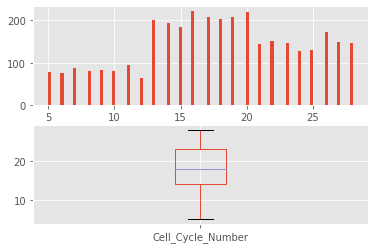

[0.52804467 0.12500977 0.20151745 ... 0.45153699 1.26785504 1.34436272]
(array([], dtype=int64),)


In [12]:
# histogram  to check Outlier data for Numeric Features
plt.subplot(2,1,1)
New_data['Cell_Cycle_Number'].hist(bins=100)
plt.subplot(2,1,2)
New_data.boxplot(column=['Cell_Cycle_Number'])
plt.show()
z = np.abs(stats.zscore(New_data['Cell_Cycle_Number']))
print(z)
threshold = 3
print(np.where(z > 3))

## As from above Array ouput for Z score is Empty so , No is outlier)

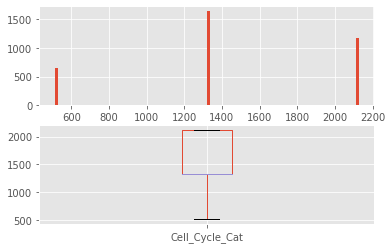

[1.19710071 0.21435125 0.21435125 ... 0.21435125 1.62580322 1.19710071]
(array([], dtype=int64),)


In [13]:
plt.subplot(2,1,1)
New_data['Cell_Cycle_Cat'].hist(bins=100)
plt.subplot(2,1,2)
New_data.boxplot(column=['Cell_Cycle_Cat'])
plt.show()
z1 = np.abs(stats.zscore(New_data['Cell_Cycle_Cat']))
print(z1)
threshold = 3
print(np.where(z1 > 3))

## As from above Array ouput for Z1>3 score is Empty so , No is outlier)


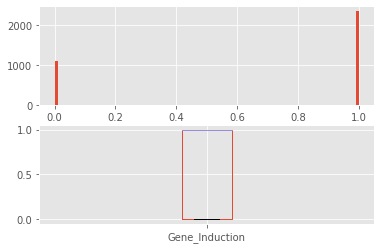

[0.68224003 0.68224003 0.68224003 ... 1.46575978 1.46575978 0.68224003]
(array([], dtype=int64),)


In [14]:
plt.subplot(2,1,1)
New_data['Gene_Induction'].hist(bins=100)
plt.subplot(2,1,2)
New_data.boxplot(column=['Gene_Induction'])
plt.show()
z2 = np.abs(stats.zscore(New_data['Gene_Induction']))
print(z2)
threshold = 3
print(np.where(z2 > 3))

## As from above Array ouput for Z1>3 score is Empty so , No is outlier)


# Invalid data check(check whether column have data of data type)

In [15]:
# New_data['chromosome'].map(type)
##So we can see mostly data in this Column. is Int but some values are of String type, So we need to filter those Rows.
New_data['chromosome'].map(type) != int
New_data.drop(New_data[New_data['chromosome'].map(type) != int].index,inplace=True)
##Check again if Str rows are deleted .
New_data['chromosome'].map(type)
##Convert chromosome to Int type as now all values are int type 

New_data['chromosome'] = New_data['chromosome'].astype(int)

In [16]:
print(New_data.dtypes)

Rec_ID                 int64
GeneID                 int64
Colour                object
Cell_Cycle_Cat         int64
Cell_Cycle_Number      int64
Gene_Induction         int64
Symbol                object
chromosome             int32
description           object
type_of_gene          object
Other_designations    object
Class                 object
dtype: object


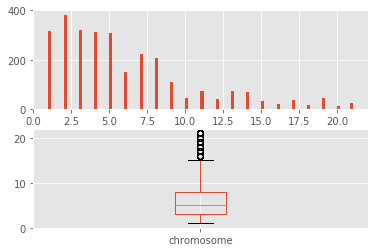

[0.87386133 3.03603998 1.08108933 ... 0.65664459 0.65664459 0.65664459]
(array([   1,   49,   82,  229,  262,  343,  418,  482,  638,  684,  685,
        691,  702,  713,  749,  758,  764,  781,  788,  892,  934,  955,
        976,  983, 1005, 1113, 1115, 1139, 1147, 1166, 1241, 1259, 1338,
       1402, 1426, 1443, 1481, 1492], dtype=int64),)
5.0


In [18]:
plt.subplot(2,1,1)
New_data['chromosome'].hist(bins=100)
plt.subplot(2,1,2)
New_data.boxplot(column=['chromosome'])
plt.show()
z3 = np.abs(stats.zscore(New_data['chromosome']))
print(z3)
threshold = 3
print(np.where(z3 > 3))


## As from above Array ouput for Z1>3 score is Empty so  and also From Boxplot we can see there are Outliers in This coulmn 
## So we need to treat these Outlier values
New_data['chromosome'].describe()

## So we can  drop these outliers or we can also compute with Mean values. Values which > 15 are outliers
# replace missing values with the median.
med = New_data['chromosome'].median()
print(med)
New_data["chromosome"] = np.where(New_data["chromosome"] >15, med,New_data["chromosome"] )


In [21]:
## Check if outlier treateed or not 

z3 = np.abs(stats.zscore(New_data['chromosome']))
print(z3)
threshold = 3
print(np.where(z3 > 3))
New_data['chromosome'].describe()




[0.94659632 0.07981988 1.653733   ... 0.65767084 0.65767084 0.65767084]
(array([], dtype=int64),)


count    2827.000000
mean        5.276265
std         3.461712
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        15.000000
Name: chromosome, dtype: float64

# Model feature selection

In [22]:
## Remove unnecessary Columns Like Rec_ID(as this is from Data record id),Description(No need to Model),Other_designations Etc.
New_data2=New_data.drop(['Rec_ID','description','Other_designations','Symbol','GeneID','Symbol'],axis=1)
print(New_data2.shape)


(2827, 7)


In [23]:
print(New_data2.dtypes)

Colour                object
Cell_Cycle_Cat         int64
Cell_Cycle_Number      int64
Gene_Induction         int64
chromosome           float64
type_of_gene          object
Class                 object
dtype: object


In [24]:
##Feature Selection
feature_cols = ['Colour', 'Cell_Cycle_Cat', 'Cell_Cycle_Number', 'Gene_Induction','chromosome','type_of_gene']
X = New_data2[feature_cols] # Features
y = New_data2.Class
## use dummy variable conversion for Catogorical variable Coulour
pd.get_dummies(X.Colour)
colour_dummies=pd.get_dummies(X.Colour,prefix='Colour')
##Then, we use pd.concat() to attach dummies to the DataFrame X.
X1= pd.concat([X, colour_dummies], axis=1)
##Now drop original coulum colour as we have created dummy Columns for the same
X1.drop(['Colour'],axis=1,inplace=True)
print(X1)
print(X1.shape)

print(X1.dtypes)
gene_dummies=pd.get_dummies(X1.type_of_gene,prefix='Gene_type')
X1= pd.concat([X1,gene_dummies], axis=1)

##Now drop original coulum colour as we have created dummy Columns for the same
X1.drop(['type_of_gene'],axis=1,inplace=True)
print(X1.dtypes)
                

      Cell_Cycle_Cat  Cell_Cycle_Number  Gene_Induction  chromosome  \
0               2128                 21               1         2.0   
1               1320                 17               1         5.0   
3               2128                 28               0        11.0   
4               1320                 16               1         3.0   
5               1320                 18               1        13.0   
6               1320                 13               1         8.0   
7               1320                 15               1         6.0   
8               2128                 22               1        11.0   
9               1320                 17               1         5.0   
10              1320                 19               1         2.0   
11              1320                 18               1         3.0   
13              1320                 17               1         6.0   
28              1320                 15               1         6.0   
29    

# Split data set in Training and test

In [26]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [27]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [28]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7985865724381626


# # Installing libraries used for Tree Visualization

In [30]:
!conda install --yes pydotplus
!conda install --yes graphviz

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



# Visualizing Decision Trees

In [31]:
### Visualizing Decision Trees

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

C:\Users\Lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# ways of improving the model

In [42]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8280329799764429


In [43]:
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)


|--- feature_4 <= 0.50
|   |--- feature_3 <= 9.50
|   |   |--- feature_1 <= 20.50
|   |   |   |--- class: Animal
|   |   |--- feature_1 >  20.50
|   |   |   |--- class: Animal
|   |--- feature_3 >  9.50
|   |   |--- class: Animal
|--- feature_4 >  0.50
|   |--- feature_3 <= 9.50
|   |   |--- feature_1 <= 22.50
|   |   |   |--- class: Plant
|   |   |--- feature_1 >  22.50
|   |   |   |--- class: Plant
|   |--- feature_3 >  9.50
|   |   |--- class: Animal



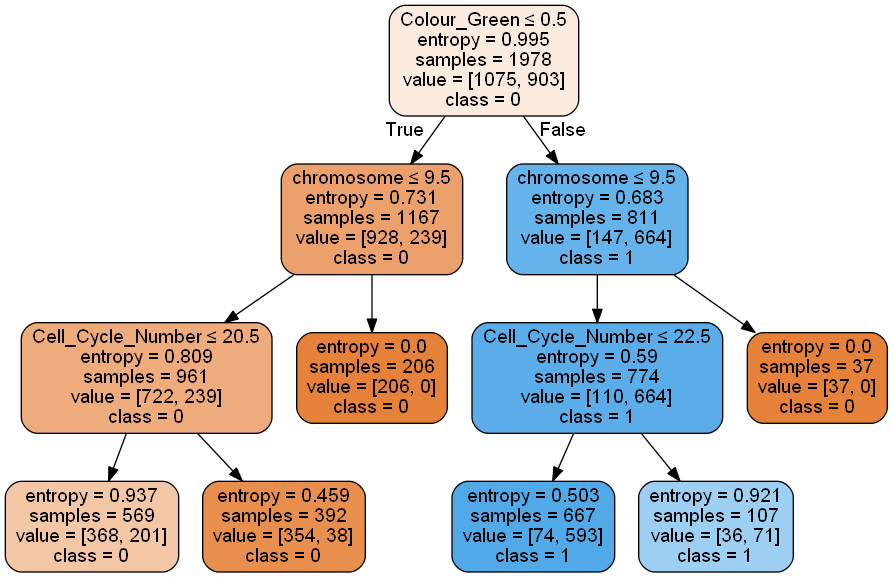

In [44]:
### Visualizing Decision Trees
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())